In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
from skimage.util import random_noise
import statistics as stat
import time

# 1 - Salt and pepper noise generation

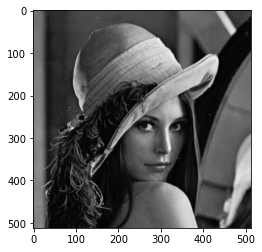

In [89]:
lena_gray = cv2.imread('images/lena_gray.tif', 0)

plt.imshow(lena_gray, 'gray');

In [90]:
def generate_noise(img, p):
    img_copy = copy.deepcopy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if random.random() <= p:
                img_copy[i][j] = random.choice([0, 255])
                pass
    return img_copy

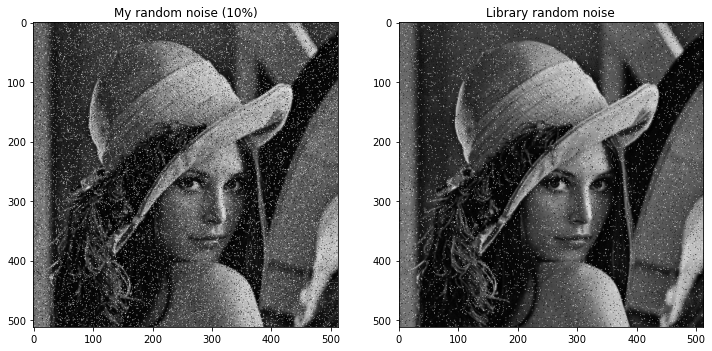

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('My random noise (10%)')
axs[1].set_title('Library random noise')

lena_gray_sp = generate_noise(lena_gray, 0.1)
sp = random_noise(lena_gray, mode='s&p', seed=None, clip=True)

axs[0].imshow(lena_gray_sp, 'gray');
axs[1].imshow(sp, 'gray');

---

# 2 - Mean filtering

In [125]:
def filter_mean(img, kernel_size=3):
    pad = (kernel_size-1)//2
    img_copy = np.pad(img, pad, 'constant', constant_values=(0))
    
    for i in range(pad, img_copy.shape[0]-pad):
        for j in range(pad, img_copy.shape[1]-pad):
            img_copy[i][j] = np.mean(img_copy[i-pad:i+pad+1, j-pad:j+pad+1])
    
    return img_copy[pad:img_copy.shape[0]-pad, pad:img_copy.shape[1]-pad]

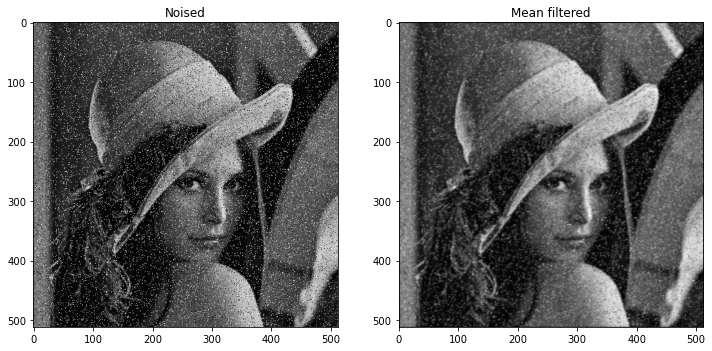

In [128]:
lena_gray_mean = filter_mean(lena_gray_sp)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('Noised')
axs[1].set_title('Mean filtered')

axs[0].imshow(lena_gray_sp, 'gray');
axs[1].imshow(lena_gray_mean, 'gray');

**Note:** As we can see from the images above, the mean filtering reduces the salt and pepper noise by smoothing the image.

---

# 3 - Median filtering

In [126]:
def filter_median(img, kernel_size=3):
    pad = (kernel_size-1)//2
    img_copy = np.pad(img, pad, 'constant', constant_values=(0))
    
    for i in range(pad, img_copy.shape[0]-pad):
        for j in range(pad, img_copy.shape[1]-pad):
            img_copy[i][j] = np.median(img_copy[i-pad:i+1+pad, j-pad:j+pad+1])
    
    return img_copy[pad:img_copy.shape[0]-pad][pad:img_copy.shape[1]-pad]

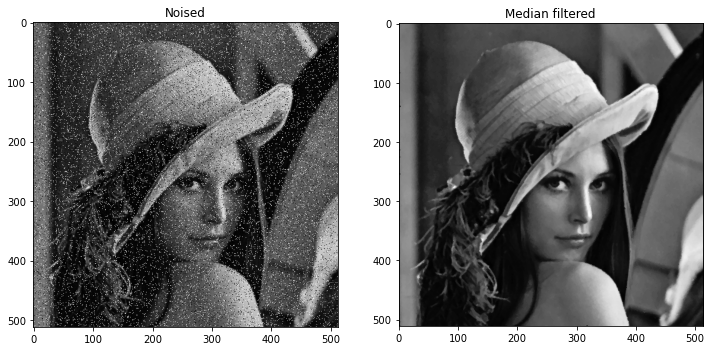

In [116]:
lena_gray_median = filter_median(lena_gray_sp)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('Noised')
axs[1].set_title('Median filtered')

axs[0].imshow(lena_gray_sp, 'gray');
axs[1].imshow(lena_gray_median, 'gray');

## Comparison with mean filtering

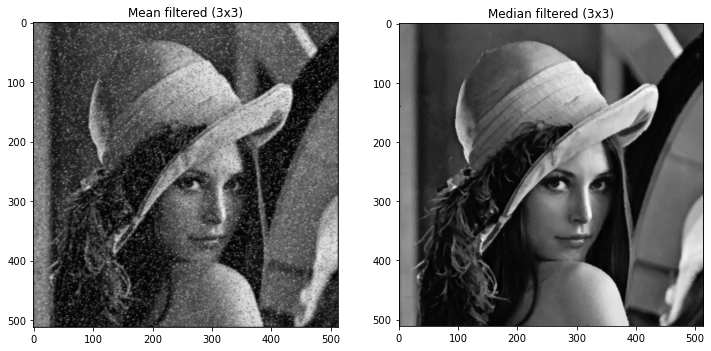

In [130]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('Mean filtered (3x3)')
axs[1].set_title('Median filtered (3x3)')

axs[0].imshow(lena_gray_mean, 'gray');
axs[1].imshow(lena_gray_median, 'gray');

In [131]:
start_time = time.time()
filter_median(lena_gray_sp)
print("--- Median filtering (3x3) %s seconds ---" % (time.time() - start_time))

start_time = time.time()
filter_mean(lena_gray_sp)
print("--- Mean filtering (3x3) %s seconds ---" % (time.time() - start_time))

--- Median filtering (3x3) 5.831334114074707 seconds ---
--- Mean filtering (3x3) 2.3096261024475098 seconds ---


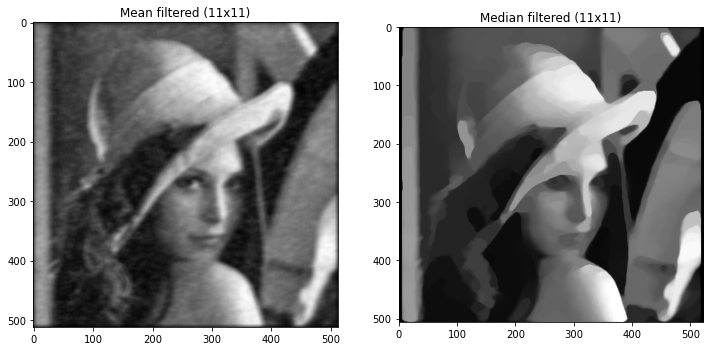

In [129]:
lena_gray_median2 = filter_median(lena_gray_sp, 11)
lena_gray_mean2 = filter_mean(lena_gray_sp, 11)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('Mean filtered (11x11)')
axs[1].set_title('Median filtered (11x11)')

axs[0].imshow(lena_gray_mean2, 'gray');
axs[1].imshow(lena_gray_median2, 'gray');

##### Convolve function

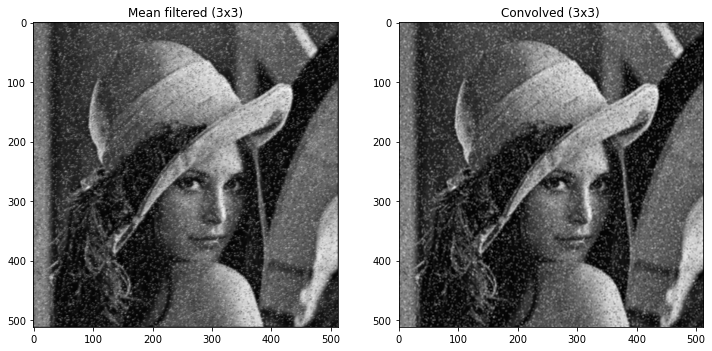

In [178]:
lena_gray_convolved = cv2.filter2D(lena_gray_sp, -1, np.ones(shape=(3,3))/9)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('Mean filtered (3x3)')
axs[1].set_title('Convolved (3x3)')

axs[0].imshow(lena_gray_mean, 'gray');
axs[1].imshow(lena_gray_convolved, 'gray');

---

# 4 - Gaussian filtering

In [160]:
def filter_gaussian(img, sigma):
    M = np.zeros(shape=(3,3))
    img_copy = np.pad(img, 1, 'constant', constant_values=(0))
    
    for i in range(3):
        for j in range(3):
            M[i][j] = np.exp(-(i**2 + j**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            tmp = np.matmul(M, img[i-1:i+2, j-1:j+2])
            img_copy[i][j] = np.sum(tmp.flatten(order='C'))
    
    return img_copy

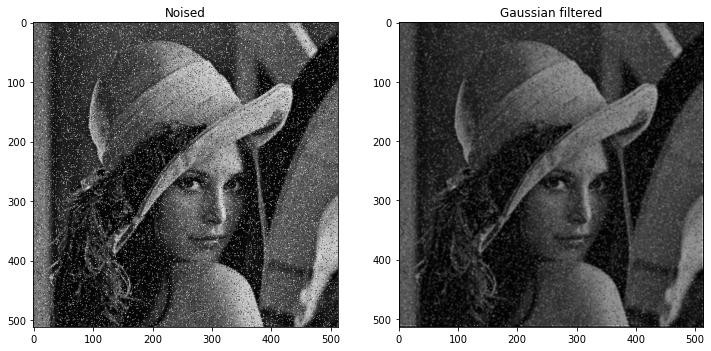

In [99]:
lena_gray_gaussian = filter_gaussian(lena_gray_sp, 2)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('Noised')
axs[1].set_title('Gaussian filtered')

axs[0].imshow(lena_gray_sp, 'gray');
axs[1].imshow(lena_gray_gaussian, 'gray');